# Heart Disease Prediction

## Import Library

In [1]:
# Mengimpor library yang dibutuhkan untuk analisis data, pemodelan, dan evaluasi.
import pandas as pd # Untuk manipulasi data dalam bentuk DataFrame (struktur data tabular).
import numpy as np # Untuk operasi numerik, terutama pada array.
import matplotlib.pyplot as plt # Untuk membuat visualisasi statis, interaktif, dan animasi dalam Python.
import seaborn as sns # Berdasarkan matplotlib, menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang menarik dan informatif.
from sklearn.model_selection import train_test_split, GridSearchCV # train_test_split: Untuk membagi dataset menjadi subset pelatihan dan pengujian. GridSearchCV: Untuk melakukan pencarian grid (grid search) dengan cross-validation untuk menemukan hyperparameter (parameter yang mengontrol proses pembelajaran model) terbaik.
from sklearn.preprocessing import StandardScaler # Untuk melakukan penskalaan fitur (feature scaling) dengan menstandarisasi fitur dengan menghapus rata-rata dan menskalakan ke varian unit.
from sklearn.pipeline import Pipeline # Untuk membuat alur kerja (pipeline) yang menggabungkan beberapa langkah pemrosesan data dan pemodelan.
from sklearn.linear_model import LogisticRegression # Model regresi logistik (logistic regression) untuk klasifikasi biner.
from sklearn.ensemble import RandomForestClassifier # Model Random Forest (Random Forest) untuk klasifikasi, menggunakan ensemble (gabungan) dari pohon keputusan (decision trees).
from sklearn.neighbors import KNeighborsClassifier # Model K-Nearest Neighbors (KNN) untuk klasifikasi berdasarkan jarak ke tetangga terdekat.
from sklearn.svm import SVC # Model Support Vector Classifier (SVC) untuk klasifikasi menggunakan Support Vector Machine (SVM).
from xgboost import XGBClassifier # Model XGBoost (Extreme Gradient Boosting) untuk klasifikasi, merupakan implementasi yang dioptimalkan dari gradient boosting.
from sklearn.neural_network import MLPClassifier # Model Multi-layer Perceptron (MLP), jenis jaringan saraf (neural network) untuk klasifikasi.
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, # accuracy_score: Mengukur akurasi model. precision_score: Mengukur presisi model. recall_score: Mengukur recall (sensitivitas) model. f1_score: Mengukur F1-score (rata-rata harmonik presisi dan recall).
    confusion_matrix, roc_auc_score, classification_report, ConfusionMatrixDisplay # confusion_matrix: Membuat matriks kebingungan (confusion matrix). roc_auc_score: Menghitung Area Under the Receiver Operating Characteristic Curve (ROC AUC). classification_report: Menampilkan laporan klasifikasi yang berisi metrik evaluasi utama. ConfusionMatrixDisplay: Untuk menampilkan matriks kebingungan secara visual.
)
from imblearn.over_sampling import SMOTE # SMOTE (Synthetic Minority Over-sampling Technique): Teknik oversampling untuk menangani ketidakseimbangan kelas (class imbalance) dengan membuat sampel sintetis dari kelas minoritas.
from imblearn.pipeline import Pipeline as ImbPipeline # ImbPipeline: Alur kerja dari library imbalanced-learn yang kompatibel dengan scikit-learn pipeline dan memungkinkan penanganan ketidakseimbangan kelas dalam alur kerja.
import joblib # Untuk menyimpan dan memuat model Python sebagai file.
import warnings # Untuk mengelola peringatan.
warnings.filterwarnings('ignore') # Mengabaikan peringatan untuk output yang lebih bersih.

## EDA (Exploratory Data Analysis)

In [2]:
# Memuat data dari file CSV ke dalam DataFrame Pandas.
# pd.read_csv(): Fungsi dari Pandas untuk membaca data dari file CSV.
# '/content/heart_disease.csv': Path atau lokasi file CSV.
df = pd.read_csv('/content/heart_disease.csv')
# Menampilkan 5 baris pertama dari DataFrame untuk melihat struktur awal data.
# df.head(): Metode DataFrame untuk menampilkan baris-baris awal data. Defaultnya 5 baris.
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Menampilkan nama-nama kolom dalam DataFrame untuk memahami fitur yang tersedia.
# df.columns: Atribut DataFrame yang mengembalikan objek Index yang berisi nama-nama kolom.
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
# Menampilkan 5 baris terakhir dari DataFrame untuk melihat data bagian akhir.
# df.tail(): Metode DataFrame untuk menampilkan baris-baris akhir data. Defaultnya 5 baris.
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
# Menampilkan jumlah baris dan kolom dalam DataFrame (bentuk DataFrame) untuk mengetahui ukuran dataset.
# df.shape: Atribut DataFrame yang mengembalikan tuple (jumlah baris, jumlah kolom).
df.shape

(1025, 14)

In [6]:
# Menampilkan ringkasan informasi tentang DataFrame, termasuk tipe data setiap kolom dan jumlah nilai non-null.
# df.info(): Metode DataFrame yang mencetak ringkasan DataFrame, termasuk indeks dtype dan nama kolom, non-null values, dan penggunaan memori.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# Memeriksa jumlah nilai yang hilang (null) di setiap kolom untuk mengidentifikasi data yang perlu ditangani.
# df.isnull(): Mengembalikan DataFrame boolean dengan nilai True di mana data adalah NaN (Not a Number).
# .sum(): Menjumlahkan nilai True di setiap kolom, yang setara dengan menghitung jumlah nilai null.
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


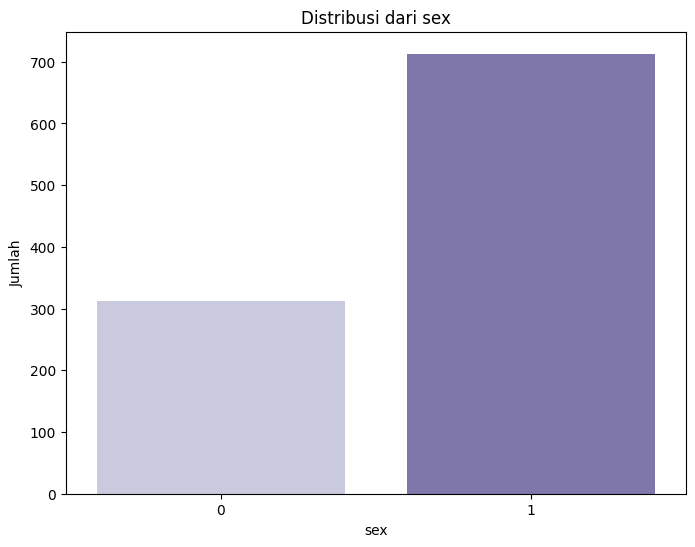


Jumlah nilai untuk 'sex':
sex
1    713
0    312
Name: count, dtype: int64


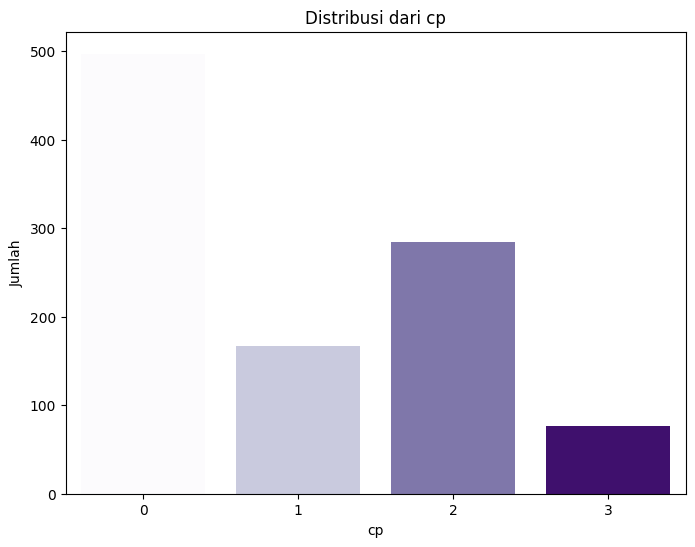


Jumlah nilai untuk 'cp':
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64


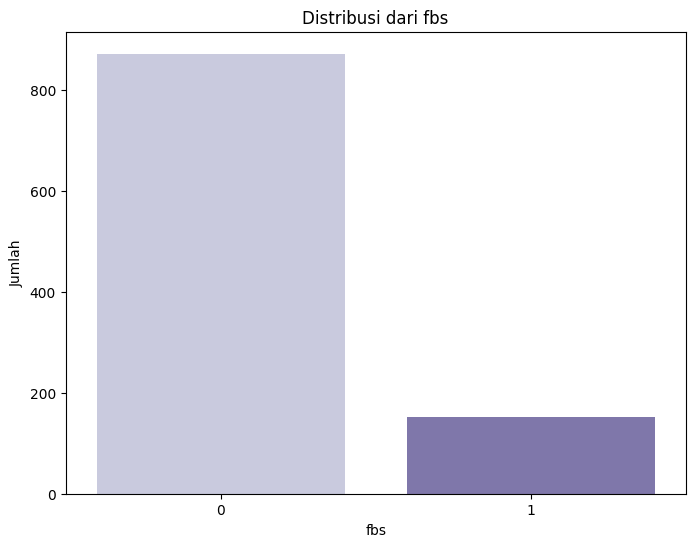


Jumlah nilai untuk 'fbs':
fbs
0    872
1    153
Name: count, dtype: int64


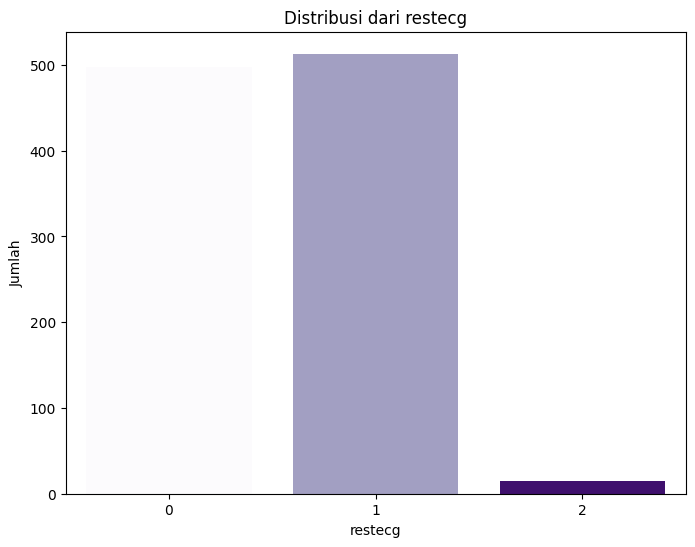


Jumlah nilai untuk 'restecg':
restecg
1    513
0    497
2     15
Name: count, dtype: int64


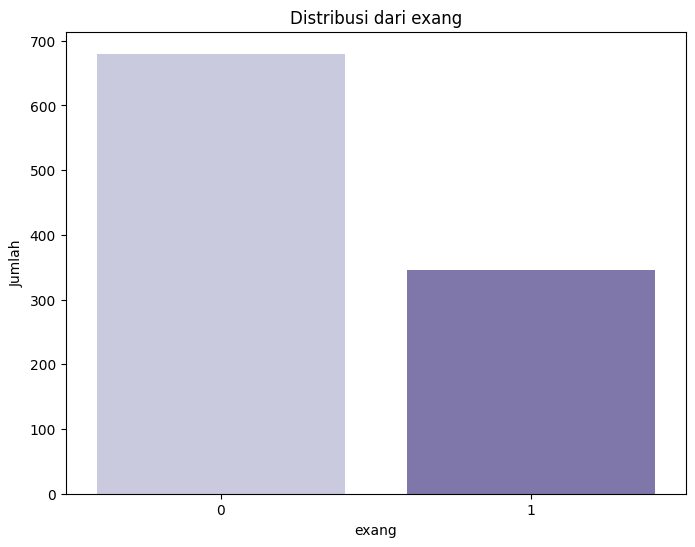


Jumlah nilai untuk 'exang':
exang
0    680
1    345
Name: count, dtype: int64


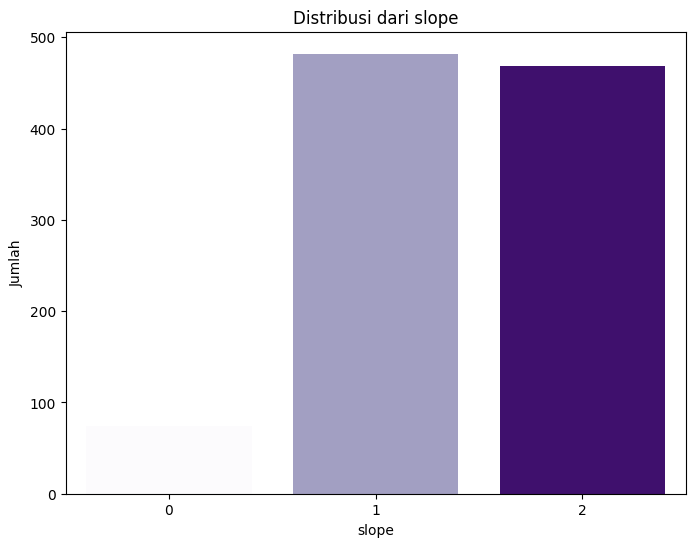


Jumlah nilai untuk 'slope':
slope
1    482
2    469
0     74
Name: count, dtype: int64


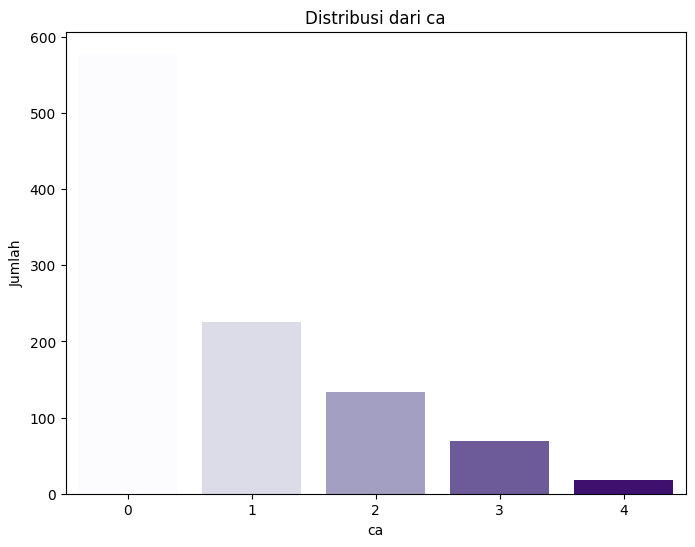


Jumlah nilai untuk 'ca':
ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64


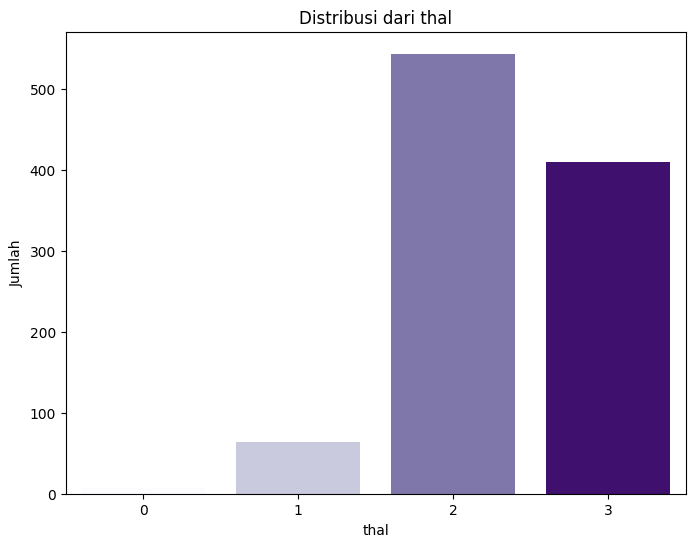


Jumlah nilai untuk 'thal':
thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64


In [8]:
# Visualisasi distribusi data kategorikal (data yang mewakili kategori) untuk memahami sebaran setiap kategori.
cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] # Daftar nama kolom kategorikal yang akan divisualisasikan.
for col in cat: # Melakukan iterasi melalui setiap nama kolom dalam daftar 'cat'.
    plt.figure(figsize=(8, 6)) # Membuat gambar baru untuk setiap plot dengan ukuran 8x6 inci. plt.figure(): Fungsi dari matplotlib.
    sns.countplot(data=df, x=col, hue=col, palette='Purples', legend=False) # Membuat countplot (plot batang yang menunjukkan hitungan kemunculan setiap kategori) untuk setiap kolom kategorikal. sns.countplot(): Fungsi dari seaborn. data=df: Menggunakan DataFrame 'df'. x=col: Kolom yang akan diplot pada sumbu x. hue=col: Menggunakan kolom yang sama untuk pewarnaan batang, membedakan berdasarkan kategori. palette='Purples': Menggunakan skema warna 'Purples'. legend=False: Menyembunyikan legenda.
    plt.title(f'Distribusi dari {col}') # Memberi judul pada plot menggunakan nama kolom saat ini.
    plt.xlabel(col) # Memberi label sumbu x dengan nama kolom saat ini.
    plt.ylabel('Jumlah') # Memberi label sumbu y dengan 'Jumlah'.
    plt.show() # Menampilkan plot. plt.show(): Fungsi dari matplotlib.
    print(f"\nJumlah nilai untuk '{col}':") # Mencetak judul untuk hitungan nilai.
    print(df[col].value_counts()) # Menampilkan value counts (jumlah kemunculan setiap nilai unik) untuk setiap kolom kategorikal. df[col].value_counts(): Metode Series yang mengembalikan Series yang berisi hitungan nilai unik dalam urutan menurun.

In [9]:
# Menghasilkan statistik deskriptif dari DataFrame, seperti mean, std, min, max, dll., untuk memahami karakteristik data numerik.
# df.describe(): Metode DataFrame yang menghasilkan statistik deskriptif yang merangkum tendensi sentral, dispersi, dan bentuk distribusi dataset.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# Menghitung jumlah kemunculan setiap nilai unik dalam kolom 'target' untuk melihat distribusi kelas target.
# df['target']: Memilih kolom 'target' dari DataFrame.
# .value_counts(): Metode Series yang mengembalikan Series yang berisi hitungan nilai unik dalam urutan menurun.
df['target'].value_counts()

,count
target,
1,526
0,499


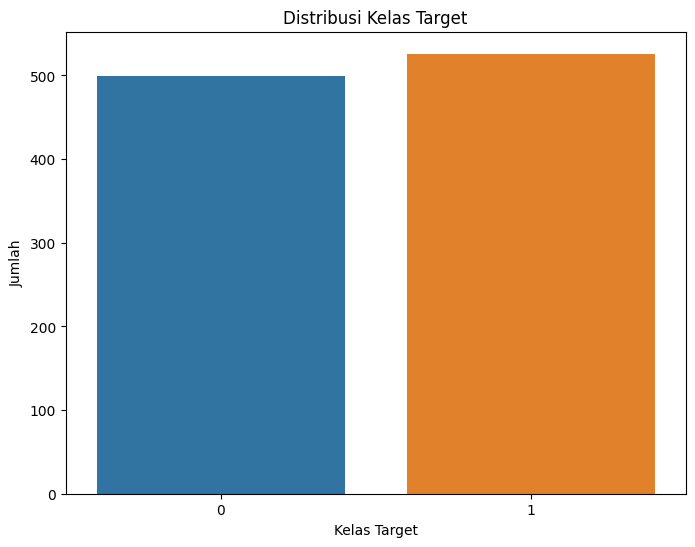

In [11]:
# Visualisasi distribusi kelas target untuk melihat apakah ada ketidakseimbangan kelas.
plt.figure(figsize=(8, 6)) # Membuat gambar baru dengan ukuran 8x6 inci.
sns.countplot(data=df, x='target', hue='target', legend=False) # Membuat countplot untuk kolom 'target'. data=df: Menggunakan DataFrame 'df'. x='target': Kolom yang akan diplot pada sumbu x. hue='target': Menggunakan kolom 'target' untuk pewarnaan. legend=False: Menyembunyikan legenda.
plt.title('Distribusi Kelas Target') # Memberi judul pada plot.
plt.xlabel('Kelas Target') # Memberi label sumbu x.
plt.ylabel('Jumlah') # Memberi label sumbu y.
plt.show() # Menampilkan plot.

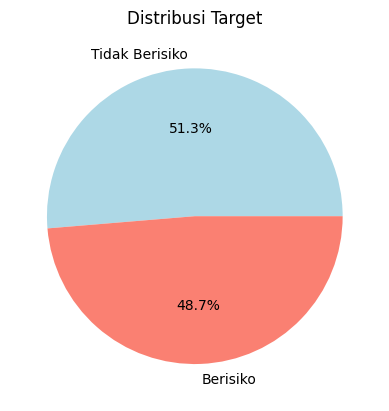

In [12]:
# Persentase distribusi target
df['target'].value_counts().plot(kind='pie', labels=['Tidak Berisiko', 'Berisiko'], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Distribusi Target')
plt.ylabel('')
plt.show()

1 --> Defective Heart

0 --> Healthy Heart

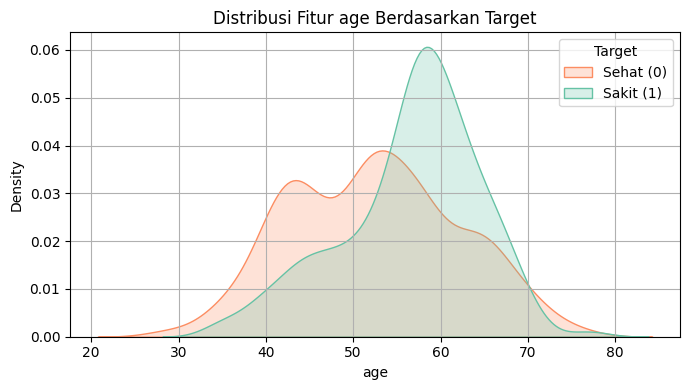

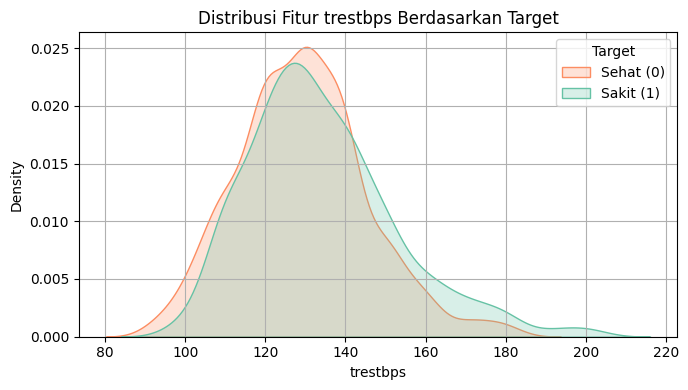

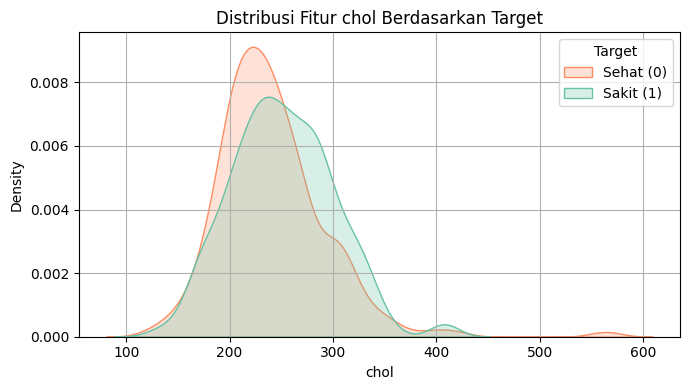

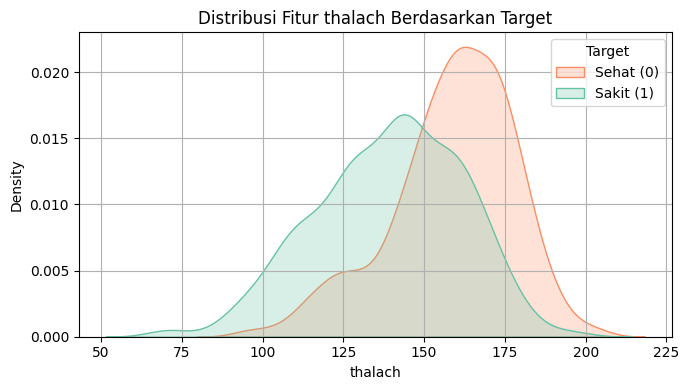

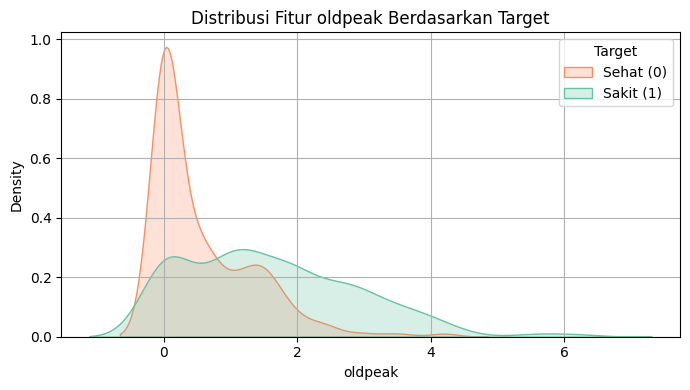

In [13]:
# Cek distribusi fitur numerik berdasarkan target menggunakan KDE (Kernel Density Estimate) plot.
# Buat salinan data agar tidak mengubah aslinya
df_viz = df.copy()

# Tentukan kolom numerik untuk plot
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Buat plot untuk setiap fitur numerik
for col in numerical_cols:
    plt.figure(figsize=(7, 4))
    # Membuat KDE plot untuk melihat distribusi fitur numerik berdasarkan nilai 'target'.
    sns.kdeplot(data=df_viz, x=col, hue='target', fill=True, common_norm=False, palette='Set2')
    plt.title(f"Distribusi Fitur {col} Berdasarkan Target")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend(title="Target", labels=["Sehat (0)", "Sakit (1)"])
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print('\n')

In [14]:
# Melihat korelasi semua fitur dengan variabel target untuk mengidentifikasi hubungan linear.
# df.corr(numeric_only=True): Menghitung matriks korelasi (correlation matrix) antara semua kolom numerik dalam DataFrame. numeric_only=True memastikan hanya kolom numerik yang digunakan.
# ['target']: Memilih kolom 'target' dari matriks korelasi, menghasilkan Series yang berisi korelasi setiap fitur dengan 'target'.
# .sort_values(ascending=False): Mengurutkan nilai korelasi dalam urutan menurun.
correlations = df.corr(numeric_only=True)['target'].sort_values(ascending=False)
correlations # Menampilkan Series korelasi.

,target
target,1.000000
cp,0.434854
thalach,0.422895
slope,0.345512
restecg,0.134468
fbs,-0.041164
chol,-0.099966
trestbps,-0.138772
age,-0.229324
sex,-0.279501


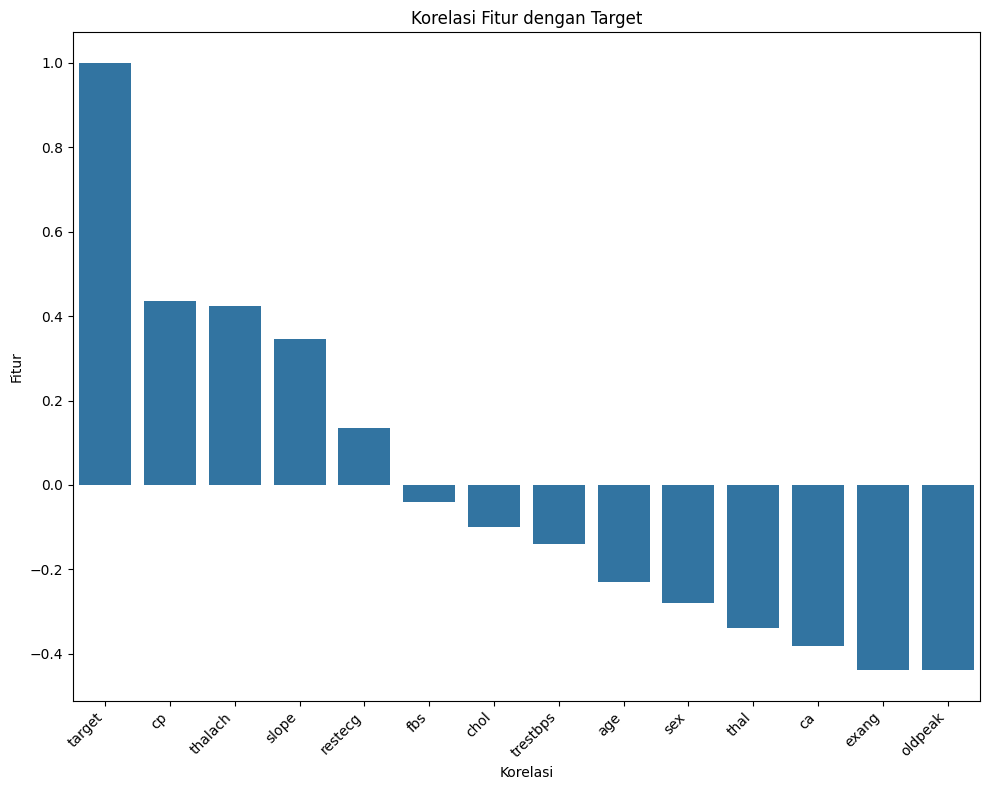

In [15]:
# Visualisasi korelasi fitur dengan target menggunakan bar plot agar mudah dibandingkan.
plt.figure(figsize=(10,8)) # Membuat gambar baru dengan ukuran 10x8 inci.
sns.barplot(y=correlations.values, x=correlations.index) # Membuat barplot. sns.barplot(): Fungsi dari seaborn. y=correlations.values: Menggunakan nilai korelasi sebagai tinggi batang (sumbu y). x=correlations.index: Menggunakan nama fitur (indeks Series korelasi) sebagai label batang (sumbu x).
plt.title("Korelasi Fitur dengan Target") # Memberi judul pada plot.
plt.xlabel("Korelasi") # Memberi label sumbu x.
plt.ylabel("Fitur") # Memberi label sumbu y.
plt.xticks(rotation=45, ha='right') # Memutar label sumbu x agar tidak tumpang tindih.
plt.tight_layout() # Menyesuaikan tata letak plot.
plt.show() # Menampilkan plot.

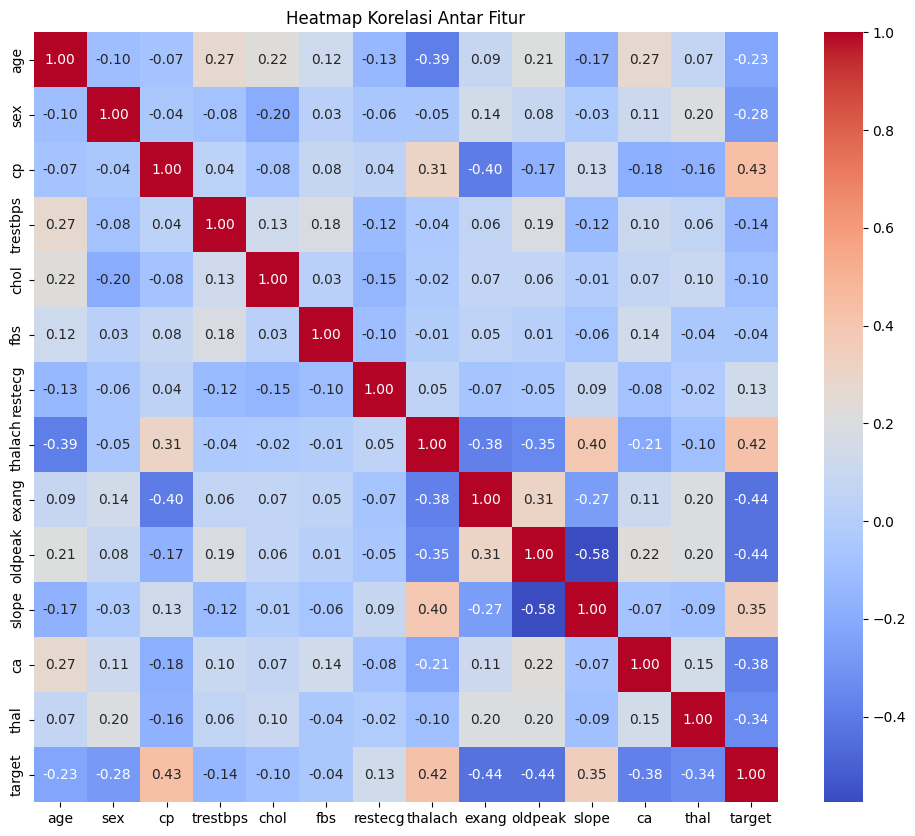

In [16]:
# Heatmap korelasi (visualisasi matriks korelasi) untuk melihat hubungan antar semua pasangan fitur numerik.
plt.figure(figsize=(12, 10)) # Membuat gambar baru dengan ukuran 12x10 inci.
# Membuat heatmap. sns.heatmap(): Fungsi dari seaborn.
# df.corr(numeric_only=True): Matriks korelasi dari DataFrame.
# annot=True: Menampilkan nilai korelasi pada heatmap.
# cmap='coolwarm': Menggunakan skema warna 'coolwarm' (biru-merah) untuk menunjukkan korelasi positif dan negatif.
# fmt=".2f": Memformat anotasi nilai korelasi menjadi 2 angka desimal.
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur') # Memberi judul pada heatmap.
plt.show() # Menampilkan heatmap.

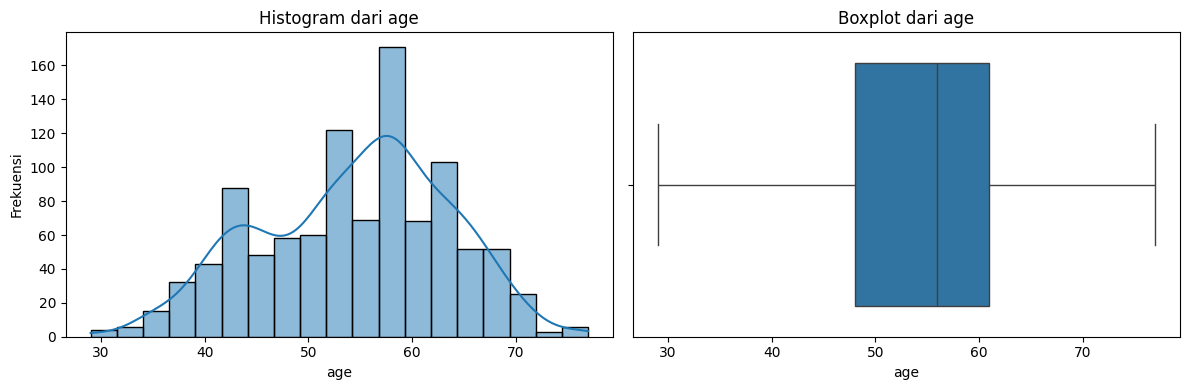

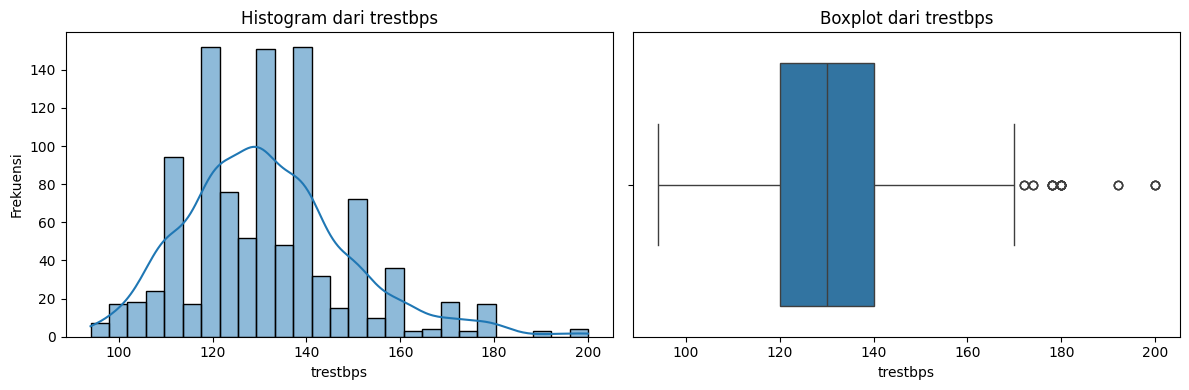

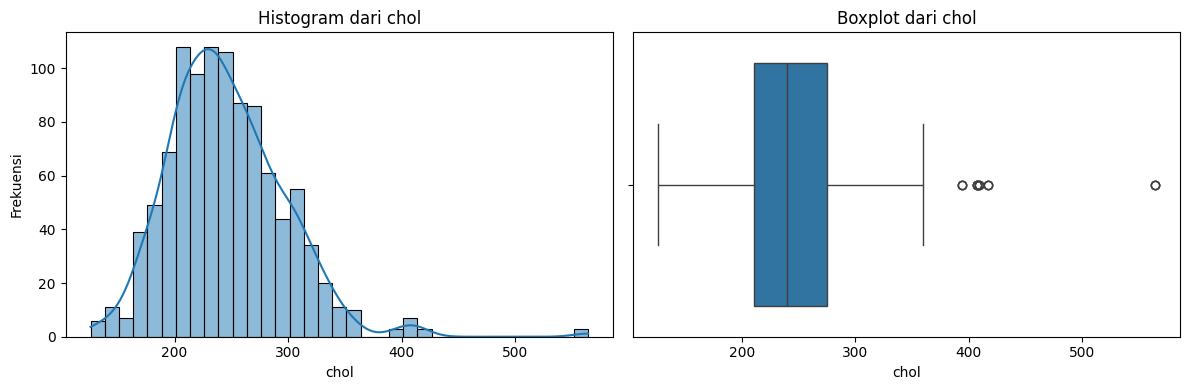

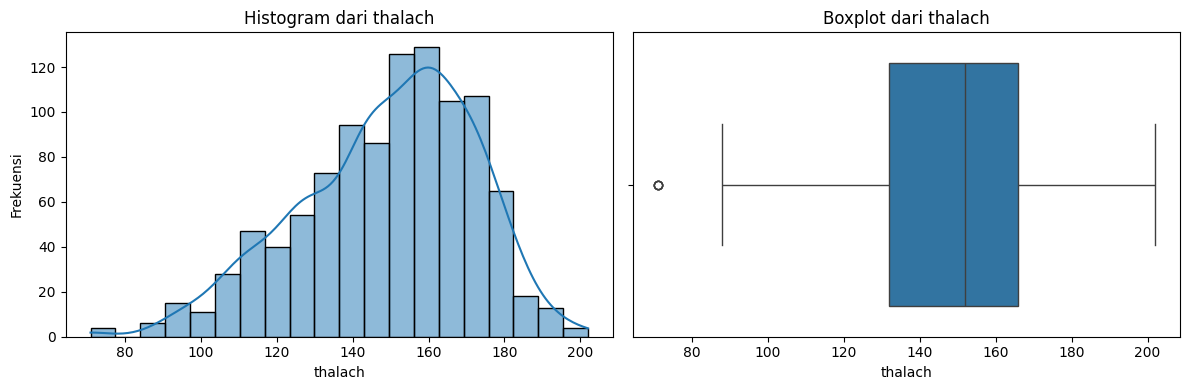

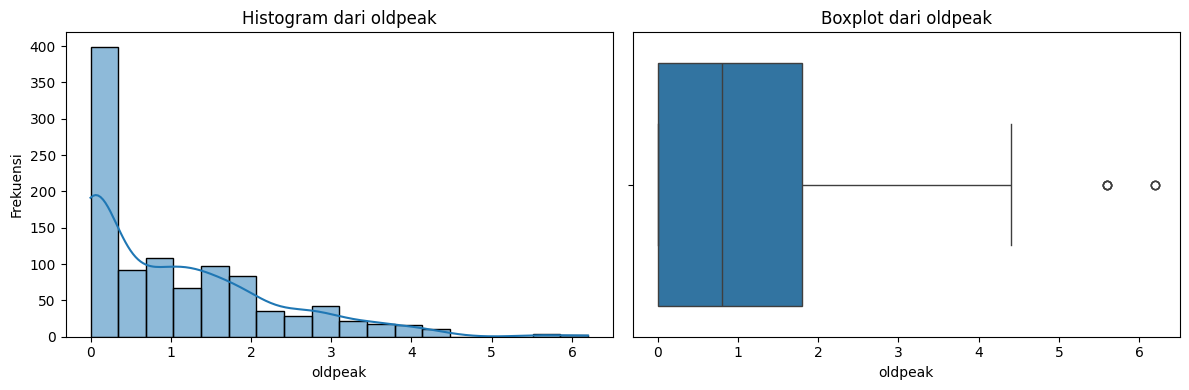

In [17]:
# Melihat visualisasi Histogram dan Boxplot untuk kolom numerik untuk memahami distribusi dan mendeteksi outlier.
num_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # Daftar nama kolom numerik.

for col in num_columns: # Melakukan iterasi melalui setiap nama kolom dalam daftar 'num_columns'.
    fig, axes = plt.subplots(1, 2, figsize=(12, 4)) # Membuat gambar (fig) dan set sumbu (axes) dengan 1 baris dan 2 kolom subplot. figsize=(12, 4): Mengatur ukuran gambar.

    # Membuat histogram (histplot) untuk kolom saat ini pada subplot pertama.
    sns.histplot(df[col], kde=True, ax=axes[0]) # sns.histplot(): Fungsi dari seaborn. df[col]: Data untuk histogram. kde=True: Menampilkan estimasi kepadatan kernel (kernel density estimate) di atas histogram. ax=axes[0]: Menentukan subplot untuk histogram.
    axes[0].set_title(f'Histogram dari {col}') # Memberi judul pada subplot histogram.
    axes[0].set_xlabel(col) # Memberi label sumbu x histogram.
    axes[0].set_ylabel('Frekuensi') # Memberi label sumbu y histogram.

    # Membuat boxplot untuk kolom saat ini pada subplot kedua.
    sns.boxplot(x=df[col], ax=axes[1]) # sns.boxplot(): Fungsi dari seaborn. x=df[col]: Data untuk boxplot. ax=axes[1]: Menentukan subplot untuk boxplot.
    axes[1].set_title(f'Boxplot dari {col}') # Memberi judul pada subplot boxplot.
    axes[1].set_xlabel(col) # Memberi label sumbu x boxplot.

    print('\n') # Mencetak baris kosong untuk pemisah antar visualisasi.

    plt.tight_layout() # Menyesuaikan parameter subplot agar pas dengan rapi ke dalam area gambar.
    plt.show() # Menampilkan gambar yang berisi kedua subplot.

In [18]:
# Menghitung jumlah baris duplikat dalam DataFrame.
# Menampilkan bentuk DataFrame asli untuk membandingkan jumlah baris sebelum dan sesudah menghapus duplikat.
# df.shape: Atribut DataFrame yang mengembalikan tuple (jumlah baris, jumlah kolom) dari DataFrame asli.
print("Jumlah data duplikat:", df.duplicated().sum())
print("Bentuk DataFrame asli:", df.shape)

Jumlah data duplikat: 723
Bentuk DataFrame asli: (1025, 14)


In [19]:
# Menghapus baris duplikat dari DataFrame untuk memastikan setiap observasi unik.
# df.drop_duplicates(): Metode DataFrame untuk menghapus baris duplikat. Mengembalikan DataFrame baru dengan baris duplikat yang dihapus.
# Menampilkan bentuk DataFrame setelah menghapus duplikat untuk melihat jumlah baris yang tersisa.
# df_clean.shape: Atribut DataFrame yang mengembalikan tuple (jumlah baris, jumlah kolom) dari DataFrame yang sudah dibersihkan.
df_clean = df.drop_duplicates()
print("Jumlah data duplikat:", df_clean.duplicated().sum())
print("Bentuk DataFrame setelah menghapus duplikat:", df_clean.shape)

Jumlah data duplikat: 0
Bentuk DataFrame setelah menghapus duplikat: (302, 14)


In [20]:
# Menghapus baris di mana nilai 'ca' adalah 4 atau nilai 'thal' adalah 0,
# karena nilai-nilai ini sering dianggap sebagai outlier atau nilai yang hilang
# dalam dataset penyakit jantung ini.
# Menampilkan bentuk DataFrame setelah menghapus outlier untuk melihat dampaknya.
df_clean = df_clean[(df_clean["ca"] != 4) & (df_clean["thal"] != 0)]
print("Bentuk DataFrame setelah menghapus nilai ca=4 dan thal=0:", df_clean.shape)

Bentuk DataFrame setelah menghapus nilai ca=4 dan thal=0: (296, 14)


## Splitting the Features and Target

In [21]:
# Memisahkan fitur (variabel independen) dan target (variabel dependen) dari DataFrame yang sudah dibersihkan.
# X akan berisi semua kolom kecuali 'target'.
# df_clean.drop(columns='target', axis=1): Menghapus kolom 'target' dari DataFrame df_clean. columns='target': Menentukan kolom yang akan dihapus. axis=1: Menunjukkan bahwa operasi dilakukan pada kolom.
X = df_clean.drop(columns='target', axis=1)
# y akan berisi hanya kolom 'target'.
# df_clean['target']: Memilih kolom 'target' dari DataFrame df_clean.
y = df_clean['target']

In [22]:
# Menampilkan DataFrame fitur (X) untuk melihat data fitur yang akan digunakan untuk pelatihan.
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [23]:
# Menampilkan Series target (y) untuk melihat data target yang akan diprediksi.
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
723,1
733,1
739,0
843,0


## Splitting Data into Training Data & Testing Data

In [24]:
# Membagi data menjadi set pelatihan (training set) dan pengujian (testing set).
# train_test_split(): Fungsi dari scikit-learn untuk membagi array atau matriks menjadi subset pelatihan dan pengujian acak.
# X, y: Data fitur dan target.
# test_size=0.2: Menentukan proporsi dataset yang akan digunakan untuk pengujian (20%).
# stratify=y: Memastikan distribusi kelas yang sama di set pelatihan dan pengujian seperti distribusi kelas di variabel target asli (y). Ini penting untuk dataset dengan kelas yang tidak seimbang.
# random_state=42: Mengatur seed untuk pengacakan agar hasil pembagian data dapat direproduksi (reproducible).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [25]:
# Mencetak bentuk DataFrame fitur asli, set fitur pelatihan, dan set fitur pengujian
# untuk memastikan pembagian data telah dilakukan dengan benar.
print("Data X:", X.shape)
print("Data X Train:", X_train.shape)
print("Data X Test:", X_test.shape)

Data X: (296, 13)
Data X Train: (236, 13)
Data X Test: (60, 13)


## Define Models

In [26]:
# Mendefinisikan model-model klasifikasi yang akan digunakan dalam dictionary.
# Dictionary ini memetakan nama model (string) ke instance objek model dengan hyperparameter awal.
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000), # Model Regresi Logistik. max_iter=1000: Mengatur jumlah iterasi maksimum untuk konvergensi.
    "Random Forest": RandomForestClassifier(random_state=42), # Model Random Forest Classifier. random_state untuk reproduksibilitas hasil.
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), # Model XGBoost Classifier. use_label_encoder=False dan eval_metric='logloss' untuk menghindari peringatan dan menentukan metrik evaluasi. random_state untuk reproduksibilitas.
    "KNN": KNeighborsClassifier(), # Model K-Nearest Neighbors Classifier.
    "SVM": SVC(probability=True, random_state=42), # Model Support Vector Classifier. probability=True: Mengaktifkan estimasi probabilitas, diperlukan untuk menghitung ROC AUC. random_state untuk reproduksibilitas.
    "Neural Network": MLPClassifier(max_iter=1000, random_state=42) # Model Multi-layer Perceptron Classifier (Jaringan Saraf). max_iter=1000: Mengatur jumlah iterasi maksimum untuk konvergensi. random_state untuk reproduksibilitas.
}

## Evaluation function

In [27]:
# Mendefinisikan fungsi untuk mengevaluasi kinerja model klasifikasi.
# Fungsi ini menerima objek model, data pelatihan dan pengujian (fitur dan target).
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Melakukan prediksi pada data pelatihan dan pengujian menggunakan model yang diberikan.
    y_train_pred = model.predict(X_train) # model.predict(): Melakukan prediksi kelas untuk data input pelatihan.
    y_test_pred = model.predict(X_test) # model.predict(): Melakukan prediksi kelas untuk data input pengujian.
    # Melakukan prediksi probabilitas jika model mendukungnya, untuk menghitung ROC AUC.
    # model.predict_proba(): Melakukan prediksi probabilitas kelas untuk data input. [:, 1] memilih probabilitas kelas positif (kelas 1).
    # hasattr(model, "predict_proba"): Memeriksa apakah objek model memiliki metode predict_proba sebelum memanggilnya.
    y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Mencetak laporan klasifikasi untuk data pengujian, yang berisi metrik utama seperti presisi, recall, f1-score, dan support.
    print("\n=== Classification Report (Test) ===")
    # classification_report(): Menghasilkan laporan teks yang menunjukkan metrik klasifikasi utama (presisi, recall, f1-score, support) per kelas pada data pengujian.
    print(classification_report(y_test, y_test_pred))

    # Menghitung ROC AUC Score jika probabilitas prediksi tersedia. ROC AUC mengukur kemampuan model membedakan antara kelas positif dan negatif.
    # roc_auc_score(): Menghitung Area Under the Receiver Operating Characteristic Curve dari skor prediksi (probabilitas).
    roc = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else None
    print(f"ROC AUC Score: {roc}\n") # Mencetak ROC AUC Score.

    # Mencetak matriks kebingungan untuk data pengujian untuk melihat jumlah True Positive, True Negative, False Positive, dan False Negative.
    print("Confusion Matrix - Test:\n", confusion_matrix(y_test, y_test_pred))
    print("Confusion Matrix - Train:\n", confusion_matrix(y_train, y_train_pred))

    # Mengembalikan dictionary yang berisi metrik evaluasi utama pada data pengujian.
    return {
        "Accuracy": accuracy_score(y_test, y_test_pred), # accuracy_score(): Menghitung proporsi prediksi yang benar pada data pengujian.
        "Precision": precision_score(y_test, y_test_pred), # precision_score(): Menghitung presisi (True Positives / (True Positives + False Positives)) pada data pengujian.
        "Recall": recall_score(y_test, y_test_pred), # recall_score(): Menghitung recall (True Positives / (True Positives + False Negatives)) pada data pengujian.
        "F1 Score": f1_score(y_test, y_test_pred), # f1_score(): Menghitung F1-score (rata-rata harmonik presisi dan recall) pada data pengujian.
        "ROC AUC": roc # ROC AUC Score pada data pengujian.
    }

## Run all models with pipeline and SMOTE

In [28]:
# Mendefinisikan fungsi untuk menjalankan semua model yang telah ditentukan dengan menggunakan pipeline
# yang mencakup SMOTE (untuk menangani ketidakseimbangan kelas) dan StandardScaler (untuk penskalaan fitur)
# sebelum melatih model klasifikasi.
# Fungsi ini menerima data pelatihan dan pengujian (fitur dan target).
def run_all_models_with_pipeline(X_train, X_test, y_train, y_test):
    results = [] # List kosong untuk menyimpan dictionary hasil evaluasi setiap model.
    for name, model in models.items(): # Melakukan iterasi melalui setiap nama model dan objek model dalam dictionary 'models'.
        print(f"\n================= {name} dengan Pipeline + SMOTE =================") # Mencetak judul untuk model yang sedang diproses.
        # Membuat pipeline yang menggabungkan langkah-langkah preprocessing (SMOTE, Scaling) dan model klasifikasi.
        # ImbPipeline(): Pipeline dari library imbalanced-learn yang kompatibel dengan scikit-learn pipeline dan memungkinkan penanganan ketidakseimbangan kelas dalam alur kerja.
        # ('smote', SMOTE(random_state=42)): Langkah pertama, menerapkan SMOTE (Synthetic Minority Over-sampling Technique) untuk oversampling kelas minoritas dalam data pelatihan. random_state=42 untuk reproduksibilitas.
        # ('scaler', StandardScaler()): Langkah kedua, menerapkan StandardScaler untuk penskalaan fitur. Ini menstandarkan data agar memiliki rata-rata 0 dan varian 1.
        # ('classifier', model): Langkah ketiga, menggunakan model klasifikasi yang sedang diiterasi.
        pipeline = ImbPipeline([
            ('smote', SMOTE(random_state=42)),
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])
        # Melatih pipeline menggunakan data pelatihan. Ketika fit dipanggil pada pipeline,
        # SMOTE dan penskalaan akan diterapkan secara berurutan pada X_train sebelum model dilatih.
        pipeline.fit(X_train, y_train)
        # Mengevaluasi pipeline yang sudah dilatih menggunakan fungsi evaluate_model yang telah didefinisikan.
        scores = evaluate_model(pipeline, X_train, X_test, y_train, y_test)
        scores.update({"Model": name}) # Menambahkan nama model ke dictionary hasil evaluasi.
        results.append(scores) # Menambahkan dictionary hasil evaluasi model saat ini ke list 'results'.
    # Mengembalikan DataFrame Pandas yang berisi hasil evaluasi untuk semua model.
    return pd.DataFrame(results)

In [29]:
from collections import Counter # Mengimpor kelas Counter untuk menghitung hashable objects.

# Melihat jumlah data per kelas dalam set pelatihan sebelum menerapkan SMOTE
# untuk memahami tingkat ketidakseimbangan kelas.
# Counter(y_train): Menghitung jumlah kemunculan setiap kelas dalam variabel target pelatihan sebelum SMOTE.
print("Sebelum SMOTE:", Counter(y_train))

# Menerapkan SMOTE secara manual pada set pelatihan untuk melihat hasilnya (jumlah data per kelas setelah SMOTE).
# SMOTE(random_state=42).fit_resample(X_train, y_train): Menerapkan SMOTE pada data pelatihan. fit_resample() melakukan fit pada data dan kemudian meresample data, menghasilkan set data pelatihan yang seimbang.
X_train_temp, y_train_temp = SMOTE(random_state=42).fit_resample(X_train, y_train)

# Melihat jumlah data per kelas dalam set pelatihan sesudah SMOTE
# untuk mengonfirmasi bahwa ketidakseimbangan kelas telah ditangani.
# Counter(y_train_temp): Menghitung jumlah kemunculan setiap kelas dalam variabel target pelatihan setelah SMOTE.
print("Setelah SMOTE:", Counter(y_train_temp))

Sebelum SMOTE: Counter({1: 128, 0: 108})
Setelah SMOTE: Counter({1: 128, 0: 128})


## Run pipeline modeling

In [30]:
# Menjalankan semua model dengan pipeline yang mencakup SMOTE dan StandardScaler,
# kemudian menyimpan hasilnya dalam DataFrame untuk perbandingan.
# run_all_models_with_pipeline(): Memanggil fungsi yang telah didefinisikan sebelumnya
# untuk melatih dan mengevaluasi semua model dengan pipeline pada data pelatihan dan pengujian.
# X_train, X_test, y_train, y_test: Data yang digunakan untuk pelatihan dan pengujian model.
results_df = run_all_models_with_pipeline(X_train, X_test, y_train, y_test)


================= Logistic Regression dengan Pipeline + SMOTE =================

=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.84      0.83        32

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60

ROC AUC Score: 0.8694196428571429

Confusion Matrix - Test:
 [[22  6]
 [ 5 27]]
Confusion Matrix - Train:
 [[ 91  17]
 [ 11 117]]

================= Random Forest dengan Pipeline + SMOTE =================

=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.75      0.84      0.79        32

    accuracy                           0.77        60
   macro avg       0.77      0.76      0.76        60
weighted avg       0.77      0.77      

## Compare Best Test Model

In [31]:
# Mengurutkan DataFrame hasil evaluasi model berdasarkan 'F1 Score' pada data pengujian secara menurun
# untuk mengidentifikasi model dengan kinerja terbaik dalam menyeimbangkan presisi dan recall.
# results_df.sort_values(by="F1 Score", ascending=False): Mengurutkan DataFrame berdasarkan kolom 'F1 Score' dalam urutan menurun.
# .reset_index(drop=True): Mengatur ulang indeks DataFrame setelah pengurutan, menghapus indeks asli dan membuat indeks baru dari 0.
results_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Model
0,0.850000,0.810811,0.93750,0.869565,0.872768,SVM
1,0.850000,0.848485,0.87500,0.861538,0.880580,Neural Network
2,0.816667,0.800000,0.87500,0.835821,0.847098,XGBoost
3,0.816667,0.818182,0.84375,0.830769,0.869420,Logistic Regression
4,0.783333,0.756757,0.87500,0.811594,0.848214,KNN
5,0.766667,0.750000,0.84375,0.794118,0.868304,Random Forest


## Tuning Model

In [32]:
# Mendefinisikan dictionary yang berisi model dan rentang hyperparameter yang akan di-tuning
# menggunakan GridSearchCV.
# Setiap item dalam dictionary ini adalah pasangan nama model dan tuple (instance model, dictionary parameter grid).
models = {
    # Model Regresi Logistik dengan grid parameter C.
    "Logistic Regression": (LogisticRegression(max_iter=1000), {"classifier__C": [0.1, 1.0, 10.0]}),
    # Model Random Forest dengan grid parameter n_estimators (jumlah pohon) dan max_depth (kedalaman maksimum pohon).
    "Random Forest": (RandomForestClassifier(random_state=42), {"classifier__n_estimators": [100, 200], "classifier__max_depth": [None, 10]}),
    # Model K-Nearest Neighbors dengan grid parameter n_neighbors (jumlah tetangga terdekat).
    "KNN": (KNeighborsClassifier(), {"classifier__n_neighbors": [3, 5, 7]}),
    # Model Support Vector Classifier dengan grid parameter C dan kernel. probability=True diaktifkan.
    "SVM": (SVC(probability=True, random_state=42), {"classifier__C": [0.1, 1, 10, 100], "classifier__kernel": ["rbf"]}),
    # Model XGBoost dengan grid parameter n_estimators. use_label_encoder=False dan eval_metric='logloss' diatur.
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42), {"classifier__n_estimators": [50, 100]}),
    # Model Neural Network (MLP) dengan grid parameter hidden_layer_sizes (ukuran lapisan tersembunyi). max_iter diatur.
    "Neural Network": (MLPClassifier(max_iter=500, random_state=42), {"classifier__hidden_layer_sizes": [(50,), (100,)]})
}

In [33]:
# Melakukan tuning hyperparameter untuk setiap model menggunakan GridSearchCV
# dan mengevaluasi kinerja model terbaik dari setiap tuning.
results = [] # List untuk menyimpan dictionary hasil evaluasi model terbaik setelah tuning.
best_model_pipeline = None # Variabel untuk menyimpan pipeline model terbaik secara keseluruhan.
best_f1 = 0 # Variabel untuk melacak F1 Score terbaik yang ditemukan selama tuning.

# Melakukan iterasi melalui setiap model dan grid parameternya.
for name, (model, params) in models.items():
    print(f"\nMelatih model: {name}") # Mencetak nama model yang sedang di-tuning.
    # Membuat pipeline yang mencakup SMOTE, StandardScaler, dan model saat ini.
    pipeline = ImbPipeline([
        ("smote", SMOTE(random_state=42)), # Langkah SMOTE untuk menangani ketidakseimbangan kelas.
        ("scaler", StandardScaler()), # Langkah StandardScaler untuk penskalaan fitur.
        ("classifier", model) # Model klasifikasi.
    ])

    # Melakukan Grid Search dengan Cross-Validation.
    # GridSearchCV mencari kombinasi hyperparameter terbaik dari 'params'
    # menggunakan cross-validation 5-fold (cv=5) dan metrik evaluasi 'f1' (scoring="f1").
    # n_jobs=-1 menggunakan semua inti prosesor yang tersedia untuk mempercepat proses.
    grid = GridSearchCV(pipeline, params, cv=5, scoring="f1", n_jobs=-1)
    grid.fit(X_train, y_train) # Melatih Grid Search pada data pelatihan.

    # Mendapatkan model terbaik (pipeline dengan hyperparameter terbaik) dari hasil Grid Search.
    best_clf = grid.best_estimator_
    # Melakukan prediksi menggunakan model terbaik pada data pengujian.
    y_pred = best_clf.predict(X_test)
    # Melakukan prediksi probabilitas kelas positif (kelas 1) menggunakan model terbaik pada data pengujian.
    y_proba = best_clf.predict_proba(X_test)[:, 1] if hasattr(best_clf, "predict_proba") else None

    # Menghitung metrik evaluasi kinerja model terbaik pada data pengujian.
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None


    # Mencetak laporan klasifikasi, matriks kebingungan, dan ROC AUC untuk model terbaik.
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC: {roc:.4f}\n" if roc is not None else "ROC AUC: N/A")
    print("Confusion Matrix - Test:\n", confusion_matrix(y_test, y_pred))

    # Menyimpan hasil evaluasi model terbaik ke dalam dictionary dan menambahkannya ke list results.
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC AUC": roc
    })

    # Membandingkan F1 Score model terbaik saat ini dengan F1 Score terbaik yang pernah ditemukan
    # untuk menentukan model terbaik secara keseluruhan.
    if f1 is not None and f1 > best_f1:
        best_f1 = f1
        best_model_pipeline = best_clf # Menyimpan pipeline model terbaik secara keseluruhan.


Melatih model: Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.84      0.83        32

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60

ROC AUC: 0.8694

Confusion Matrix - Test:
 [[22  6]
 [ 5 27]]

Melatih model: Random Forest
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.75      0.84      0.79        32

    accuracy                           0.77        60
   macro avg       0.77      0.76      0.76        60
weighted avg       0.77      0.77      0.76        60

ROC AUC: 0.8627

Confusion Matrix - Test:
 [[19  9]
 [ 5 27]]

Melatih model: KNN
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76    

## Compare Best Test Model After Tuning

In [34]:
# Membuat DataFrame dari list hasil evaluasi model terbaik setelah tuning.
results_df = pd.DataFrame(results)
# Mengurutkan DataFrame hasil tuning berdasarkan 'F1 Score' pada data pengujian secara menurun
# untuk menampilkan peringkat model setelah tuning.
# results_df.sort_values(by="F1 Score", ascending=False): Mengurutkan DataFrame berdasarkan kolom 'F1 Score' dalam urutan menurun.
# .reset_index(drop=True): Mengatur ulang indeks DataFrame setelah pengurutan.
results_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Neural Network,0.850000,0.848485,0.87500,0.861538,0.891741
1,XGBoost,0.816667,0.800000,0.87500,0.835821,0.847098
2,Logistic Regression,0.816667,0.818182,0.84375,0.830769,0.869420
3,KNN,0.783333,0.756757,0.87500,0.811594,0.848214
4,SVM,0.783333,0.771429,0.84375,0.805970,0.841518
5,Random Forest,0.766667,0.750000,0.84375,0.794118,0.862723


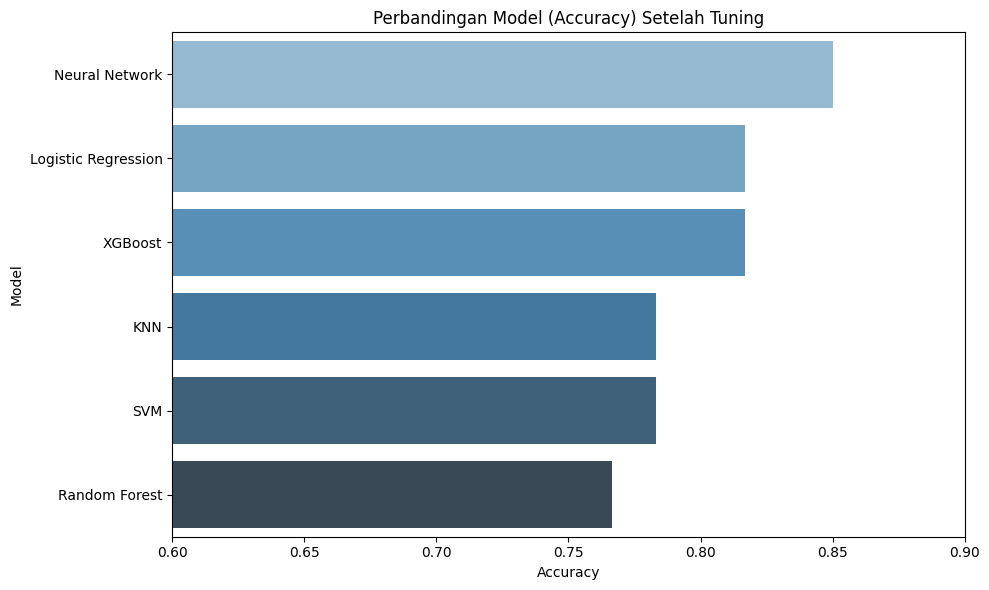

In [35]:
# Visualisasi perbandingan model berdasarkan Accuracy (rasio True Positives + True Negatives dengan total observasi)
# pada data pengujian setelah tuning.
plt.figure(figsize=(10, 6)) # Membuat gambar baru dengan ukuran 10x6 inci.
# sns.barplot(): Membuat barplot untuk memvisualisasikan Accuracy setiap model.
# data=results_df.sort_values(by="Accuracy", ascending=False): Menggunakan DataFrame hasil tuning yang diurutkan berdasarkan Accuracy secara menurun.
# x="Accuracy": Menggunakan nilai Accuracy pada sumbu x.
# y="Model": Menggunakan nama Model pada sumbu y.
# palette="Blues_d": Menggunakan skema warna 'Blues_d'.
sns.barplot(data=results_df.sort_values(by="Accuracy", ascending=False), x="Accuracy", y="Model", palette="Blues_d")
plt.title("Perbandingan Model (Accuracy) Setelah Tuning") # Memberi judul pada plot.
plt.xlabel("Accuracy") # Memberi label sumbu x.
plt.ylabel("Model") # Memberi label sumbu y.
plt.xlim(0.6, 0.9) # Mengatur batas sumbu x dari 0.6 hingga 0.9 untuk fokus pada rentang kinerja model.
plt.tight_layout() # Menyesuaikan parameter subplot agar pas dengan rapi ke dalam area gambar.
plt.show() # Menampilkan plot.

## Save Model

In [36]:
# Menyimpan DataFrame hasil evaluasi model ke dalam file CSV.
# results_df.to_csv(): Metode DataFrame untuk menulis DataFrame ke file CSV.
# "evaluasi_model.csv": Nama file CSV yang akan dibuat.
# index=False: Mencegah penulisan indeks DataFrame sebagai kolom dalam file CSV.
results_df.to_csv("evaluasi_model.csv", index=False)
print("✅ Hasil evaluasi model disimpan dalam 'evaluasi_model.csv'")

✅ Hasil evaluasi model disimpan dalam 'evaluasi_model.csv'


In [37]:
# Menyimpan pipeline model terbaik yang ditemukan setelah tuning ke dalam file menggunakan joblib.
# joblib.dump(): Fungsi dari joblib untuk menyimpan objek Python sebagai file biner.
# best_model_pipeline: Objek pipeline model terbaik yang ingin disimpan.
# "best_heart_disease_model.pkl": Nama file tempat model akan disimpan. Ekstensi .pkl umum digunakan untuk file objek Python yang di-pickle.
joblib.dump(best_model_pipeline, "best_heart_disease_model.pkl")
# Mencetak pesan konfirmasi bahwa model telah disimpan.
print("\n✅ Pipeline model terbaik disimpan dengan nama 'best_heart_disease_model.pkl'")
# Mencetak nama kelas dari model klasifikasi di dalam pipeline terbaik.
print("Model klasifikasi dalam pipeline terbaik adalah:", type(best_model_pipeline.named_steps['classifier']).__name__)


✅ Pipeline model terbaik disimpan dengan nama 'best_heart_disease_model.pkl'
Model klasifikasi dalam pipeline terbaik adalah: MLPClassifier


## Neural Network Feature Importance (using SHAP)

In [38]:
%pip install shap

### Overall Feature Importance from SHAP (Neural Network)

Menghitung nilai SHAP. Ini mungkin memakan waktu...


  0%|          | 0/60 [00:00<?, ?it/s]


=== Fitur Penting Keseluruhan Neural Network (Rata-rata Absolut SHAP) ===


,0
ca,0.111081
cp,0.097395
thal,0.094192
slope,0.086132
sex,0.070496
oldpeak,0.056830
thalach,0.052805
chol,0.048146
trestbps,0.034483
exang,0.025416


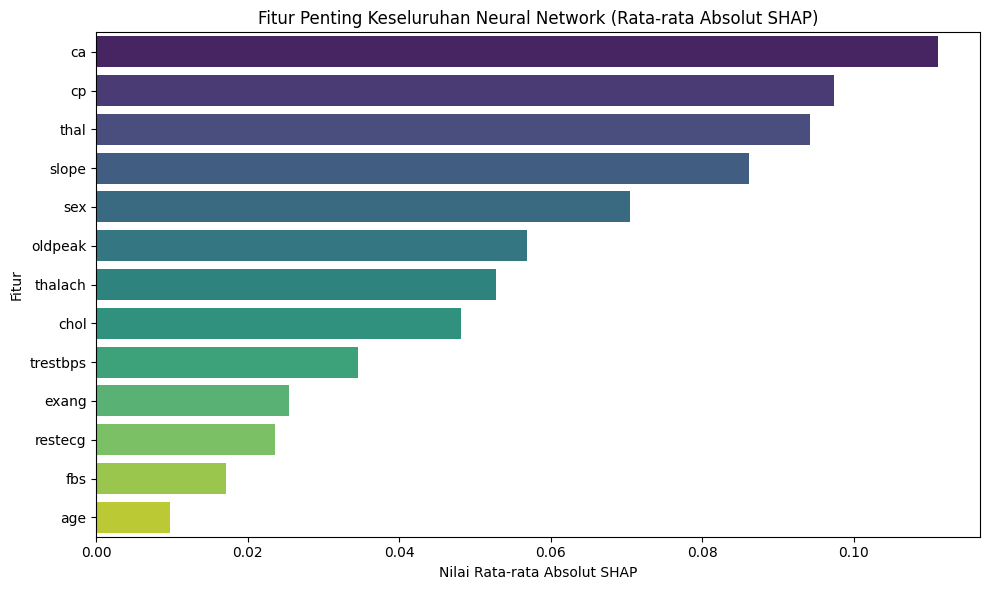

In [39]:
# Kode untuk menganalisis fitur penting model Neural Network menggunakan SHAP (SHapley Additive exPlanations).
# SHAP membantu menjelaskan output model dengan menghitung kontribusi setiap fitur terhadap prediksi.

import shap # Mengimpor library shap.

# Mengambil model Neural Network dan scaler dari pipeline model terbaik yang telah disimpan.
# best_model_pipeline: Pipeline model terbaik yang dimuat dari file.
# .named_steps['classifier']: Mengakses langkah 'classifier' (model NN) dalam pipeline.
nn_model = best_model_pipeline.named_steps['classifier']
# .named_steps['scaler']: Mengakses langkah 'scaler' (StandardScaler) dalam pipeline.
scaler = best_model_pipeline.named_steps['scaler']

# Memilih dataset latar belakang untuk KernelExplainer.
# KernelExplainer menggunakan data latar belakang untuk memperkirakan nilai SHAP.
# Menggunakan sampel data pelatihan asli (belum diskalakan) sebagai data latar belakang
# karena fungsi prediksi yang diberikan ke explainer akan melakukan penskalaan di dalamnya.
# .sample(n=100, random_state=42): Mengambil sampel acak 100 baris dari data pelatihan asli.
background_data = X_train.sample(n=100, random_state=42)

# Membuat SHAP Kernel Explainer.
# KernelExplainer adalah metode interpretasi agnostik model.
# Parameter pertama adalah fungsi prediksi model. Kita menggunakan lambda untuk
# membungkus proses penskalaan dan hanya mengembalikan probabilitas kelas positif (indeks 1).
# Parameter kedua adalah data latar belakang.
explainer = shap.KernelExplainer(lambda x: nn_model.predict_proba(scaler.transform(x))[:, 1], background_data)

# Menghitung nilai SHAP untuk data pengujian.
# Proses ini mungkin memakan waktu tergantung ukuran data pengujian dan data latar belakang.
print("Menghitung nilai SHAP. Ini mungkin memakan waktu...")
# explainer.shap_values(X_test): Menghitung nilai SHAP untuk setiap instance dalam data pengujian (X_test).
# Karena fungsi prediksi mengembalikan probabilitas kelas 1, shap_values akan menjadi array tunggal
# yang mewakili kontribusi setiap fitur terhadap probabilitas kelas 1.
shap_values = explainer.shap_values(X_test)


# Menghitung dan memvisualisasikan fitur penting keseluruhan dari SHAP values
# untuk model Neural Network menggunakan bar plot.
# Ini memberikan ukuran rata-rata dampak setiap fitur terhadap prediksi model.

# Menghitung rata-rata nilai absolut SHAP untuk setiap fitur.
# np.abs(shap_values): Mengambil nilai absolut dari semua SHAP values.
# .mean(axis=0): Menghitung rata-rata di sepanjang sumbu baris (axis=0), menghasilkan satu nilai rata-rata per fitur.
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

# Membuat Series Pandas dari rata-rata nilai absolut SHAP dengan nama fitur sebagai indeks,
# kemudian mengurutkannya dalam urutan menurun.
shap_feature_importance = pd.Series(mean_abs_shap_values, index=X_test.columns).sort_values(ascending=False)

print("\n=== Fitur Penting Keseluruhan Neural Network (Rata-rata Absolut SHAP) ===")
display(shap_feature_importance) # Menampilkan Series fitur penting.

# Memvisualisasikan fitur penting keseluruhan sebagai bar plot.
plt.figure(figsize=(10, 6)) # Membuat gambar baru.
# sns.barplot(): Membuat bar plot.
# x=shap_feature_importance.values: Menggunakan rata-rata nilai absolut SHAP sebagai data sumbu x.
# y=shap_feature_importance.index: Menggunakan nama fitur sebagai data sumbu y.
# palette='viridis': Menggunakan skema warna 'viridis'.
sns.barplot(x=shap_feature_importance.values, y=shap_feature_importance.index, palette='viridis')
plt.title('Fitur Penting Keseluruhan Neural Network (Rata-rata Absolut SHAP)') # Memberi judul plot.
plt.xlabel('Nilai Rata-rata Absolut SHAP') # Memberi label sumbu x.
plt.ylabel('Fitur') # Memberi label sumbu y.
plt.tight_layout() # Menyesuaikan tata letak.
plt.show() # Menampilkan plot.

## Predict

In [40]:
# Kode untuk memuat model terbaik yang telah disimpan dan melakukan prediksi
# menggunakan data input manual.

# Memuat pipeline model terbaik dari file yang disimpan.
try:
    best_model_pipeline = joblib.load("best_heart_disease_model.pkl")
    print("✅ Model pipeline berhasil dimuat.")
except FileNotFoundError:
    print("Error: File model 'best_heart_disease_model.pkl' tidak ditemukan. Pastikan model telah disimpan dengan benar.")
    best_model_pipeline = None # Set model menjadi None jika gagal memuat

# Jika model berhasil dimuat, definisikan fungsi prediksi dan lakukan prediksi.
if best_model_pipeline:
    # Mendefinisikan daftar nama fitur yang digunakan oleh model.
    # Daftar ini harus sesuai dengan urutan kolom fitur yang digunakan saat melatih model.
    feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

    def predict_heart_disease(input_data):
        """
        Melakukan prediksi penyakit jantung berdasarkan data input manual.

        Args:
            input_data (dict): Sebuah dictionary di mana kunci adalah nama fitur
                               dan nilai adalah nilai input.

        Returns:
            str: Pesan yang menunjukkan apakah penyakit jantung diprediksi (1) atau tidak (0),
                 beserta probabilitas prediksi.
        """
        # Membuat DataFrame dari data input manual.
        input_df = pd.DataFrame([input_data])

        # Memastikan DataFrame input memiliki kolom yang sama dengan data pelatihan
        # dan dalam urutan yang benar.
        input_df = input_df[feature_names]

        # Melakukan prediksi menggunakan pipeline yang dimuat (yang mencakup penskalaan).
        prediction = best_model_pipeline.predict(input_df)
        # Mendapatkan probabilitas prediksi untuk kelas positif (kelas 1).
        prediction_proba = best_model_pipeline.predict_proba(input_df)[:, 1] # Probabilitas kelas 1

        # Menginterpretasikan hasil prediksi dan mengembalikan pesan.
        if prediction[0] == 1:
            return f"Prediksi: Berpenyakit Jantung (Probabilitas: {prediction_proba[0]:.4f})"
        else:
            return f"Prediksi: Tidak Berpenyakit Jantung (Probabilitas: {prediction_proba[0]:.4f})"

    # --- Contoh Data Input Manual ---
    # Ubah nilai-nilai dalam dictionary ini untuk mencoba prediksi dengan input yang berbeda.
    manual_input = {
    'age': 64,
    'sex': 1,
    'cp': 2,
    'trestbps': 140,
    'chol': 335,
    'fbs': 0,
    'restecg': 1,
    'thalach': 158,
    'exang': 0,
    'oldpeak': 0.0,
    'slope': 2,
    'ca': 0,
    'thal': 2
}

    # Melakukan prediksi dengan data input manual dan mencetak hasilnya.
    prediction_result = predict_heart_disease(manual_input)
    print("\n--- Hasil Prediksi dengan Input Manual ---")
    print(prediction_result)

✅ Model pipeline berhasil dimuat.

--- Hasil Prediksi dengan Input Manual ---
Prediksi: Tidak Berpenyakit Jantung (Probabilitas: 0.4844)


In [41]:
# Mengambil satu baris data dari DataFrame asli (sebelum dihapus duplikat dan outlier)
# yang diketahui tidak memiliki penyakit jantung (target = 0) sebagai contoh.
# df[df['target'] == 0]: Memfilter DataFrame untuk baris di mana 'target' adalah 0.
# .sample(1, random_state=42): Mengambil sampel acak sebanyak 1 baris dari hasil filter. random_state=42 untuk reproduksibilitas.
df_no_disease = df[df['target'] == 0].sample(1)
# Menampilkan fitur-fitur dari baris data yang diambil sebagai contoh.
df_no_disease[feature_names]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
480,51,0,0,130,305,0,1,142,1,1.2,1,0,3


In [42]:
# Menguji fungsi prediksi (predict_heart_disease) dengan data contoh yang diketahui tidak sakit.
# df_no_disease[feature_names].iloc[0].to_dict(): Mengambil baris pertama (dan satu-satunya)
# dari DataFrame contoh yang tidak sakit, memilih kolom fitur, dan mengubahnya menjadi dictionary
# untuk digunakan sebagai input fungsi prediksi.
predict_heart_disease(df_no_disease[feature_names].iloc[0].to_dict())

'Prediksi: Tidak Berpenyakit Jantung (Probabilitas: 0.0068)'

# Task
Buatkan scree plot dari dataset "data.csv".

## Standardisasi data

### Subtask:
Standardisasi fitur numerik karena PCA sensitif terhadap skala fitur.


In [43]:
# Load the dataset
df = pd.read_csv('/content/heart_disease.csv')

# Remove duplicate rows
df_clean = df.drop_duplicates()

# Remove rows where 'ca' is 4 or 'thal' is 0
df_clean = df_clean[(df_clean["ca"] != 4) & (df_clean["thal"] != 0)].copy()

# Select numerical columns, excluding 'target'
numerical_cols = df_clean.select_dtypes(include=np.number).columns.tolist()
if 'target' in numerical_cols:
    numerical_cols.remove('target')

# Instantiate StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

# Display the first few rows of the scaled DataFrame
display(df_clean.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.279036,0.687486,-0.929316,-0.373219,-0.677510,-0.412263,0.905952,0.804083,-0.698167,-0.050770,0.979811,1.408052,1.149713,0
1,-0.168468,0.687486,-0.929316,0.474399,-0.850957,2.425638,-0.995905,0.237188,1.432322,1.752576,-2.260682,-0.723832,1.149713,0
2,1.711199,0.687486,-0.929316,0.756938,-1.409840,-0.412263,0.905952,-1.071030,1.432322,1.323208,-2.260682,-0.723832,1.149713,0
3,0.716081,0.687486,-0.929316,0.926462,-0.850957,-0.412263,0.905952,0.498832,-0.698167,-0.909506,0.979811,0.342110,1.149713,0
4,0.826650,-1.454575,-0.929316,0.361383,0.902782,2.425638,0.905952,-1.899568,-0.698167,0.722093,-0.640435,2.473994,-0.560413,0
